In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from uncertainties import correlated_values
import uncertainties as unc
import uncertainties.unumpy as unp
from uncertainties import ufloat

In [3]:
def sinCos(x, a_1, a_2):
    return a_1*np.cos(x)+a_2*np.sin(x)

In [4]:
psi = np.linspace(0,330,12)
psi = np.deg2rad(psi)
asymmetrie = np.array([-0.032,0.010,0.057,0.068,0.076,0.080,0.031,0.005,-0.041,-0.090,-0.088,-0.074])
f1 = np.cos(psi)
f2 = np.sin(psi)
A = np.vstack((f1,f2)).T # 12x2-Matrix, da zwei f und 12 psi. 
sigma = 0.011
W = np.diag(1/sigma**2*np.ones(len(psi))) # Mach eine Diagonale Matrix mit 1/sigma^2 auf der Hauptdiagonalen

In [6]:
eigeneParams = np.dot(np.linalg.inv(A.T@W@A)@A.T@W, asymmetrie)
print('Die selbst berechneten Schätzungen für die Parameter a_i sind:')
print('a_1 =', eigeneParams[0], 'und a_2 =', eigeneParams[1])

scipyParams, covariance_matrix = optimize.curve_fit(sinCos, psi, asymmetrie, sigma=sigma*np.ones(len(psi)))
scipya_1, scippya_2 = correlated_values(scipyParams, covariance_matrix)

Die selbst berechneten Schätzungen für die Parameter a_i sind:
a_1 = -0.0375062975273 und a_2 = 0.0773997759653


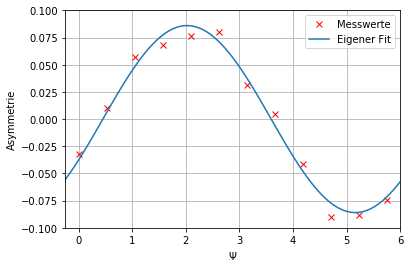

In [7]:
psilin = np.linspace(-0.5,6.5,100)
plt.plot(psi, asymmetrie, 'rx', label='Messwerte')
plt.plot(psilin, sinCos(psilin,*eigeneParams), label='Eigener Fit')
plt.legend()
plt.grid()
plt.axis((-0.25,6,-0.1,0.1))
plt.ylabel('Asymmetrie')
plt.xlabel(r'$\Psi$')
plt.show()
plt.clf()

In [8]:
V = np.linalg.inv(A.T@W@A)
sigma_a1 = np.sqrt(V[0,0]) # 1,1 Element von V ist Varianz von x_1
sigma_a2 = np.sqrt(V[1,1])
eigena_1 = ufloat(eigeneParams[0], sigma_a1)
eigena_2 = ufloat(eigeneParams[1], sigma_a2)
cov = V[0,1]
rho = cov/(sigma_a1*sigma_a2)
print('Die selbst berechneten Werte sind:')
print('')
print('Kovarianzmatrix: ', V)
print('sigma_{a_1} =', sigma_a1, ',sigma_{a_2} =', sigma_a2)
print('Korrelationskoeffizient:', rho)
print('Zur Kontrolle sind die von Scipy berechneten Parameter:')
print('a_1 mit Fehler:', scipya_1, 'a_2 mit Fehler:', scippya_2)

Die selbst berechneten Werte sind:

Kovarianzmatrix:  [[  2.01666667e-05  -1.29460255e-21]
 [ -1.29460255e-21   2.01666667e-05]]
sigma_{a_1} = 0.0044907311951 ,sigma_{a_2} = 0.0044907311951
Korrelationskoeffizient: -6.41951677001e-17
Zur Kontrolle sind die von Scipy berechneten Parameter:
a_1 mit Fehler: -0.038+/-0.004 a_2 mit Fehler: 0.077+/-0.004


In [32]:
A_0 = np.sqrt(eigeneParams[0]**2+eigeneParams[1]**2)
delta = np.arctan(eigeneParams[1]/eigeneParams[0])
print(np.arccos(eigeneParams[0]/A_0))
print(np.arcsin(eigeneParams[1]/A_0))

2.02203111366
1.11956153993


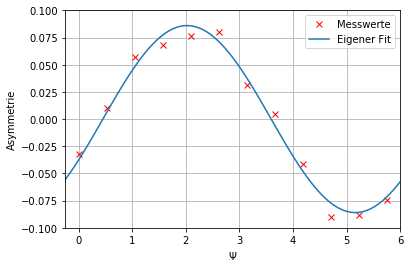

In [34]:
plt.plot(psi, asymmetrie, 'rx', label='Messwerte')
plt.plot(psilin, A_0*np.cos(psilin-np.arccos(eigeneParams[0]/A_0)), label='Eigener Fit')
plt.legend()
plt.grid()
plt.axis((-0.25,6,-0.1,0.1))
plt.ylabel('Asymmetrie')
plt.xlabel(r'$\Psi$')
plt.show()